### This is Credit card Marketing dataset. Since we are performing Clustering to split data into groups, there is no target variable and this is an Unsupervised problem. Let us build a model using K-means algorithm and see how many clusters are optimal for this dataset.

### Let's perform EDA first

In [1]:
%config IPCompleter.greedy=True
# To see the possible option that you can substitute with the half completed snippet
# To know the possible arguments a method or function takes or the type of parameters it accepts or-
# -its returns, type Just Press Shift + Tab together

#### Step 1: Download all the libraries which we generally use while performing EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import norm
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

#### Step 2: Import the data set on which EDA has to be performed

In [3]:
creditcard_df = pd.read_csv("Credit card Marketing Case Study.csv")

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Credit card Marketing dataset.
    b. The main intention of building a model on Credit card Marketing dataset is to create clusters.
    c. Based on type of data in the clusters, marketing campaign will be created for each cluster.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Based on the data above, we can get to know that "CUST_ID" is the only attribute which is not adding any information to the dataset. Rest of them are all related to Credit card transactions. But, we'll remove "CUST_ID" after applying "Duplicated()" function so that data doesn't get missed.

#### Step 5: Get to know the structure of the data set using 'info()'method

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Since we are working on K-means, it is better to have unlabeled data. By looking at the data above, we can say that all the attributes except "CUST_ID" are unlabeled. We don't have to worry about "CUST_ID" because we are going to remove that attribute. Also, none of the attributes except "MINIMUM_PAYMENTS" and "CREDIT_LIMIT" have null values.

#### Step 6: Get the 6-point summary using 'describe()' method

In [6]:
# Since there are many rows, we are transposing(converting rows to columns and vice versa) the table
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


##### By looking at values below, there are a few interesting points to note:
    a. Values in all the attributes except 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'TENURE' are unsymmetric, i.e. data in rest of the attributes are skewed.

#### Step 7: Since we don't have any categorical attributes, we can skip to univariate analysis on numerical attributes.

#### Step 8: Check the type of distribution continuous attributes have and compare it with Normal distribution. In this analysis, we are not trying to figure out how many clusters we can create. Instead, we are trying to figure out whether this dataset can be used a build a clustering based model. 

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

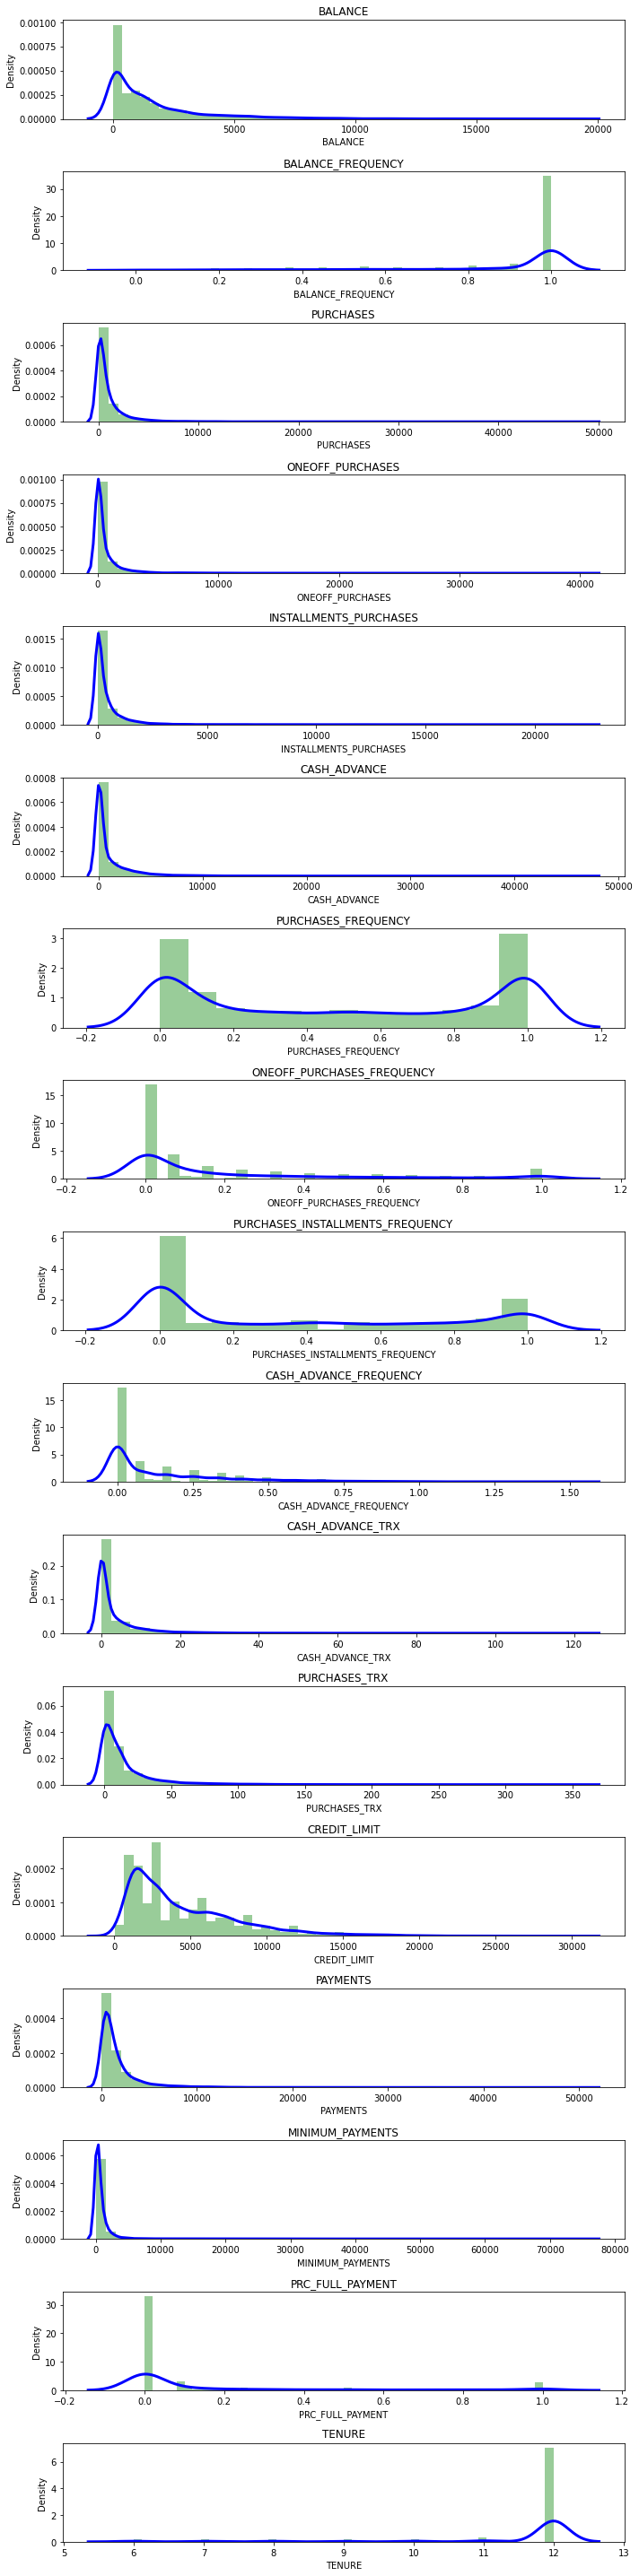

In [7]:
plt.figure(figsize=(10,40))
for i in range(1, len(creditcard_df.columns)):
  plt.subplot(17, 1, i)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

##### Based on the graphs above, attributes 'PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY' and 'CREDIT_LIMIT' will help us create clusters. So, now we know that we can build a clustering based model.

#### Step 9: Perform Bivariate analysis. We can skip this step as Bivariate analysis is performed in Supervised problems to get to know about Multicollinearity problem. In Unsupervised problems, it is not needed.

#### Step 10: Identification and treatment of Missing values.

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

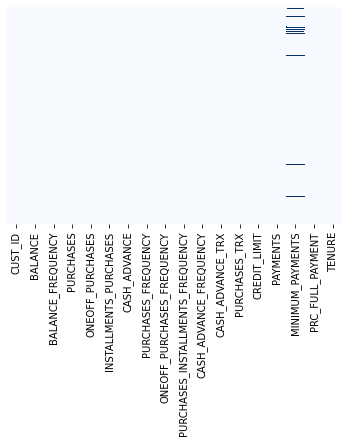

In [9]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

##### As we already know, 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' have null values. There are 313 missing values in 'MINIMUM_PAYMENTS', around 3.3%, and one missing value in payments. We will replace missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with Median and proceed with further steps.

In [10]:
# Fill up the missing elements with Median of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()

In [11]:
# Fill up the missing elements with Median of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].median()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Step 11: Check whether there are any outliers. If there are analyze them and understand whether they have to be seperated from the dataset and analysed or just remove them. Since K-means algorithm is based on distances, outliers will change the models all together. It would be a good way to minimise the outliers. If the outliers are important, then it would be a good idea to analyse them seperately.

##### Since we haven't dropped "CUST_ID" attribute, Outlier function may not work properly. We'll perform rest of the steps in EDA and comeback to Outlier treatment at the end of EDA.

#### Step 12: This is the last step of EDA. In this step we try to find the duplicate rows using 'duplicated()' function.

In [13]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

##### There are no duplicates. But, as we noted earlier, 'CUST_ID' attribute is not needed while model building. So let's remove that and then proceed with model building steps.

In [14]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [15]:
# To check whether 'CUST_ID' attribute is dropped.
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Now that 'CUST_ID' attribute is dropped, let's perform Outlier Treatment and close EDA.

<AxesSubplot:>

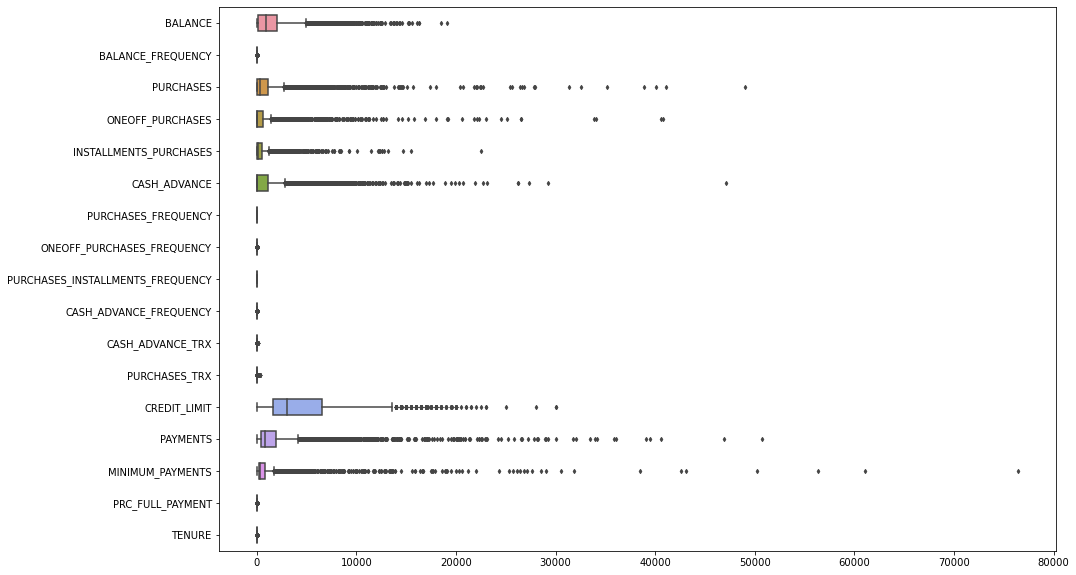

In [16]:
# orient="h" will transpose(converting rows to columns and vice versa) the plot
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df,width=0.5,ax=ax,fliersize=3, orient="h")

##### We can get to know that there are many Outliers in the table and all the columns are right skewed. It would be a better approach to remove them and analyse seperately. But as of now, we will remove the rows based on Z-score. Now we will remove rows having values which are either lower than Z = (-3) or higher than Z = 3. Here we will check values which are in this category in all the attributes and then exclude the row. The idea behind lower than Z = (-3) or higher than Z = 3 is that in Normal distribution, 99.7% of the values lie in this region. So, we are using this to exclude Outliers.

In [17]:
# We'll calculate Z-score for each attribute and convert the data into Z-scores
z = np.abs(stats.zscore(creditcard_df))

# Now we'll remove the values wherever Z-score is less than -3 (or) greater than 3
creditcard_df_new = creditcard_df[(z < 3).all(axis=1)]

##### Both Z-score approach and IQR based approach are the same ideas. If Z-score is less than -3 it means that the value is less than (Q1 - 1.7 IQR) and if Z-score is greater than 3 it means that the value is greater than (Q3 + 1.7 IQR)

In [18]:
creditcard_df_new.shape

(7434, 17)

##### Now that we have removed more than 15% of the data, let's check whether the attributes we have found earlier still show the scope for Clustering and whether any other attributes are also creating the scope.

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

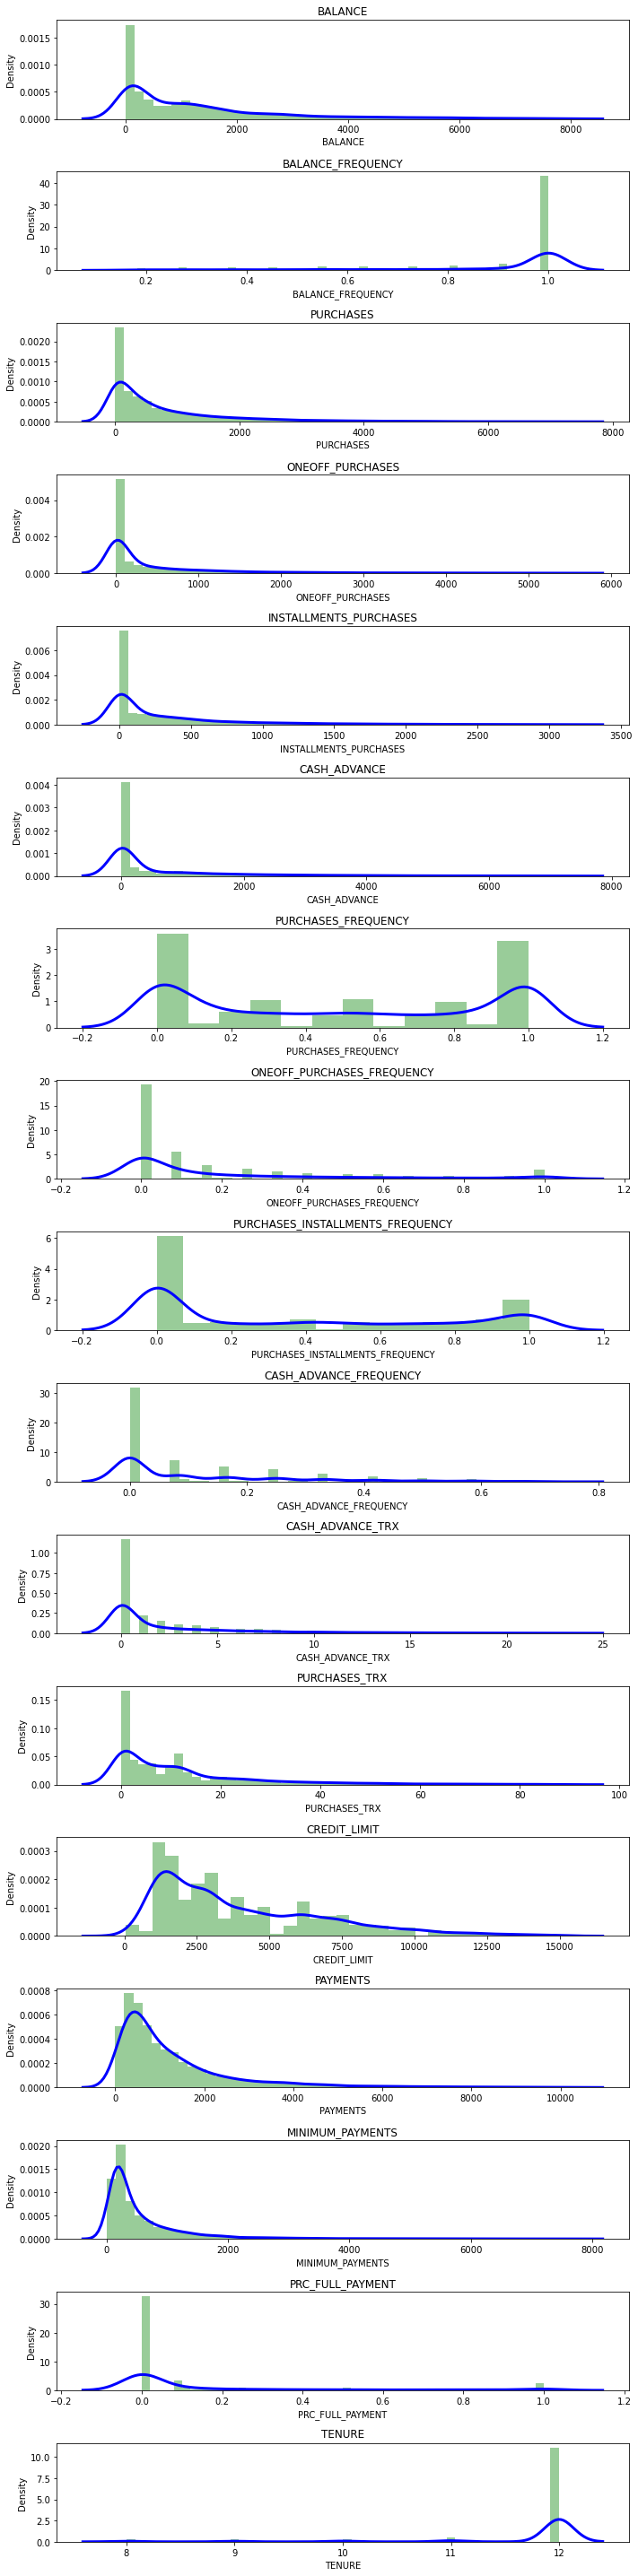

In [19]:
plt.figure(figsize=(10,40))
for i in range(len(creditcard_df_new.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df_new[creditcard_df_new.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df_new.columns[i])

plt.tight_layout()

##### Based on the graphs above, along with 'PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY' and 'CREDIT_LIMIT' attributes, the ones which showed scope for clustering before removing outliers, 'BALANCE', 'CASH_ADVANCE_FREQUENCY' and 'PURCHASES_TRX' are also showing scope for creating clusters.

### Let's start with model building steps.

##### Since we are applying K-means(Clustering) algorithm, we have to perform scaling before biulding the model.

#### Step 1: Standardize the data using 'pp.StandardScaler()' method and apply 'pp.normalize()' so that values will be within -1 to 1 range
    a. pp.StandardScaler(): This method will transform data into Z-score
    b. pp.normalize(): This method will transform data in such a way that all the observations will have value  between -1 and 1

In [20]:
# Standardize data
scaler = pp.StandardScaler() 
creditcard_df_scaled = scaler.fit_transform(creditcard_df_new)
  
# Normalizing the Data 
normalized_df = pp.normalize(creditcard_df_scaled)
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,-0.027026,0.013920,-0.042302,-0.034893,-0.030990,-0.034476,-0.019265,-0.027610,-0.014834,-0.026875,-0.031729,-0.036176,-0.037203,-0.044959,-0.029301,-0.026544,0.025394
std,0.239254,0.271923,0.208457,0.207249,0.226597,0.221126,0.287098,0.250252,0.288824,0.252112,0.226601,0.223999,0.267969,0.221542,0.207028,0.252503,0.212490
min,-0.452296,-0.878609,-0.355266,-0.363863,-0.366396,-0.357833,-0.515054,-0.447738,-0.516494,-0.454412,-0.386338,-0.374279,-0.624530,-0.513763,-0.411532,-0.448247,-0.920672
25%,-0.205002,0.016372,-0.197351,-0.175837,-0.192035,-0.178300,-0.272108,-0.202863,-0.260200,-0.215459,-0.184052,-0.204106,-0.245774,-0.204156,-0.160509,-0.185662,0.060544
50%,-0.088676,0.119404,-0.108511,-0.113400,-0.110532,-0.120917,0.005897,-0.123378,-0.116894,-0.115244,-0.119822,-0.096630,-0.094605,-0.100231,-0.098256,-0.119249,0.087900
75%,0.094023,0.181929,0.078453,0.031477,0.069954,0.045293,0.240487,0.081786,0.235306,0.135988,0.063996,0.077334,0.144409,0.055655,0.037711,0.005338,0.115646
max,0.798808,0.436138,0.645499,0.754880,0.828054,0.873147,0.562275,0.796227,0.669512,0.786173,0.855786,0.834896,0.871908,0.911076,0.975499,0.835604,0.263275


In [21]:
creditcard_df_scaled.view()

array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.56418479,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.63748261,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.06416447,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.30850755,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5833401 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.47973622,
        -0.53152321, -4.6976356 ]])

#### Step 2: Since we are working with K-means algorithm, we have to get to know how many clusters we need before model building. We can get to know this using Elbow chart and Silhouette score. Let's work on that.

Text(0, 0.5, 'Silhouette Score')

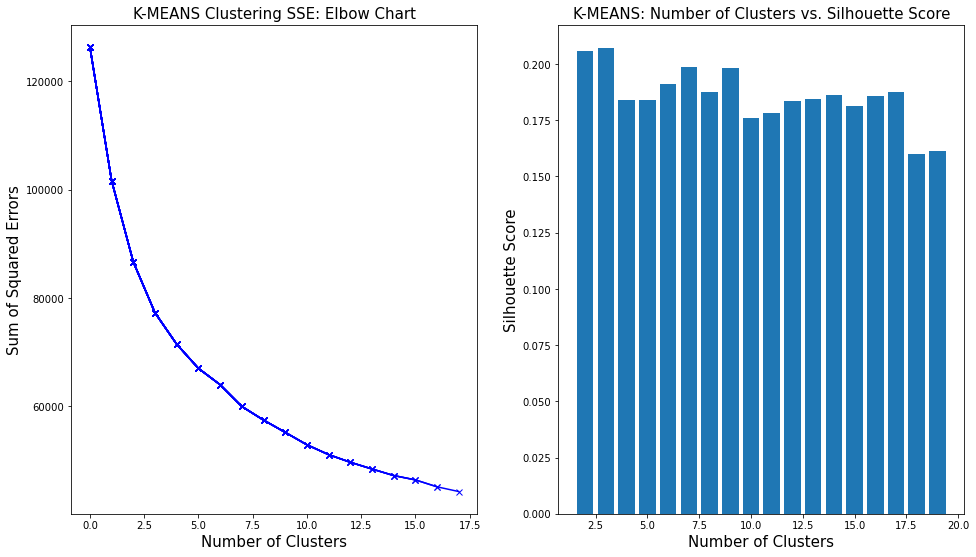

In [22]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=19
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(creditcard_df_scaled)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 20):
    silhouette_scores.append( 
        silhouette_score(creditcard_df_scaled, KMeans(n_clusters = n_cluster).fit_predict(creditcard_df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

##### Based on the two graphs above, we can see that 3 is the ideal number of clusters system suggests based on mathematical calculations. In case of Silhouette score,  we can see that 3 has max value.

#### Step 3: Build the models with (+/-)2 values from the ideal K-value we found. If the K-value is less than 5, we can go ahead with (+)2 values from the ideal K-value we found.

##### Since the ideal K-value is 3, let's try with 3, 4 & 5 and find the optimal one. Let's start with K=3 first.

In [23]:
# Building K-means model with K=3
kmeans = KMeans(3,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [24]:
kmeans.cluster_centers_.shape

(3, 17)

In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.433890,-0.258211,-0.329494,-0.290592,-0.211653,-0.410744,-0.047651,-0.259751,-0.016397,-0.440131,-0.425467,-0.273003,-0.325710,-0.392948,-0.287625,0.064231,-0.033649
1,0.087546,0.379238,1.561573,1.260634,1.187150,-0.299434,1.071039,1.209182,0.828862,-0.363203,-0.324890,1.455751,0.628687,0.720117,0.081459,0.351709,0.203464
2,0.935024,0.290401,-0.505799,-0.351284,-0.474588,1.196050,-0.760496,-0.380963,-0.636029,1.316060,1.250897,-0.550748,0.244076,0.325651,0.600777,-0.434977,-0.087429


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,611.252074,0.834548,415.268842,200.688780,215.020307,164.585652,0.466861,0.117640,0.351058,0.039799,0.637824,7.930249,3043.409660,733.135076,354.197406,0.173249,11.723873
1,1402.713478,0.970569,2354.318237,1431.599180,922.784853,302.081305,0.910223,0.540104,0.682908,0.052013,1.034176,34.067669,5845.237060,2331.943221,640.710311,0.256849,11.913192
2,2689.058370,0.951613,234.490917,152.529272,81.980945,2149.379598,0.184344,0.082779,0.107789,0.318625,7.244024,3.730962,4716.131858,1765.331081,1043.846454,0.028076,11.680934


##### Based on cluster centres, we can find features of each cluster centre which will standout and represent that cluster. By doing this we can build appropriate marketing campaigns.

##### Cluster-0: 
    a. INSTALLMENTS_PURCHASES: Cluster-0 centre has decent value in INSTALLMENTS_PURCHASES attribute, which     means that people in Cluster-0 tend towards Installment purchases.
    
    b. PRC_FULL_PAYMENT: Cluster-0 centre has lowest value in PRC_FULL_PAYMENT attribute, which means that      people in Cluster-0 tend towards making less than full payments.
    
    c. So, the better marketing strategy for Cluster-1 would be to push ads which show that credit cards makes  their life happier by allowing them to do minimum payments in case of cash crunch and rest of the amount can be paid for the next month.
    
    d. BALANCE_FREQUENCY: Cluster-0 centre has lowest value in BALANCE_FREQUENCY attribute, which means that    these people are dormant customers, i.e. people who tend to do less number purchases using credit cards.
    
    e. This marketing would work as long as people in Cluster-0 have less default rate. To get to know this info we have to look at credit limit. Since credit limits are decided based on lot of factors including no of purchases they do using credit card and default rate, we use it as a parameter to get to know the default rate.
    
    f. CREDIT_LIMIT: By comparing CREDIT_LIMIT of Cluster-0 with other clusters, we can say that people in      Cluster-0 have lowest credit limit. So, we can infer that people in Cluster-1 may have higher default rate. But, since they do less number of transactions using credit card, their CREDIT_LIMIT can be lower. So we can go ahead and build the campaign this way.

##### Cluster-1: 
    a. PURCHASES: Cluster-1 centre has higher value in PURCHASES attribute, which means that people in Cluster-1 have significantly higher purchase power.
    
    b. INSTALLMENTS_PURCHASES: Cluster-1 centre has higher value in INSTALLMENTS_PURCHASES attribute, which     means that people in Cluster-1 are more inclined towards Installment purchases.
    
    c. So, the better marketing strategy for Cluster-1 would be to push ads which show that credit cards makes  their life happier by allowing them to purchase items which they want to and convert them into installments.
    
    d. This marketing would work as long as people in Cluster-1 have very less default rate. To get to know this info we have to look at credit limit. Since credit limits are decided based on lot of factors including defa-ult rate, we use it as a parameter to get to know the default rate.
    
    e. CREDIT_LIMIT: By comparing CREDIT_LIMIT of Cluster-1 with other clusters, we can say that people in      Cluster-1 have highest credit limit. So, we can infer that people in Cluster-1 have very less default rate.

##### Cluster-2: 
    a. BALANCE: Cluster-2 centre has higher balance value. So, people in Cluster-2 probably have lot of balance in their account
    
    b. CASH_ADVANCE: Cluster-2 centre has higher Cash advance value. Since there is a large difference between  Cash advance value in Cluster-2 and Cash advance value in Cluster-0 or Cluster-1, this value makes Cluster-2 standout. Based on this we can infer that people in Cluster-2 probably take more cash out of credit cards.
    
    c. So, the better marketing strategy for Cluster-2 would be to push ads which show that credit cards are    easy and convinient way to withdraw cash.
    
    d. This marketing would work as long as people in Cluster-2 have very less default rate. To get to know this info we have to look at credit limit. Since credit limits are decided based on lot of factors including defa-ult rate, we use it as a parameter to get to know the default rate.
    
    e. CREDIT_LIMIT: By comparing CREDIT_LIMIT of Cluster-2 with other clusters, we can say that people in      Cluster-2 have decent credit limit. So, we can infer that people in Cluster-2 have less default rate.

#### Step 4: Add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [27]:
# Verifying whether the no. of values in labes match with no. of observations using which clusters are formed.
# Verifying min and max value so that we can get to know how the number of clusters

print('Shape of the labels is:',labels.shape)
print('Min value of the labels is:',labels.min())
print('Max value of the labels is:',labels.max())

Shape of the labels is: (7434,)
Min value of the labels is: 0
Max value of the labels is: 2


In [28]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


##### Now that we have added Cluster labels to each observation, we can perform multiple activities related to each cluster. Let's see a few examples.

##### Creating a new dataframe only with the elements in cluster-1

In [29]:
creditcard_df_cluster_cluster2=creditcard_df_cluster[creditcard_df_cluster['cluster']==1.0]
creditcard_df_cluster_cluster2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
11,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12,1.0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,1.0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1.0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,677.778395,0.750000,0.00,0.00,0.00,1361.306734,0.000000,0.000000,0.000000,0.125000,2,0,1500.0,1515.946459,143.812331,0.000000,8,1.0
7312,683.286191,1.000000,706.08,706.08,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,13,1500.0,1847.903530,717.097215,0.000000,12,1.0
7322,42.288669,1.000000,313.36,0.00,313.36,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,428.089548,189.922028,0.666667,12,1.0
7333,2760.898890,0.900000,0.00,0.00,0.00,4278.969301,0.000000,0.000000,0.000000,0.600000,11,0,7500.0,997.950103,750.602361,0.000000,10,1.0


##### Getting the number of observations in each cluster 

In [30]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,4173
1.0,1462
2.0,1799


##### Plotting histogram of all three clusters for each of the attributes to get to see the distribution

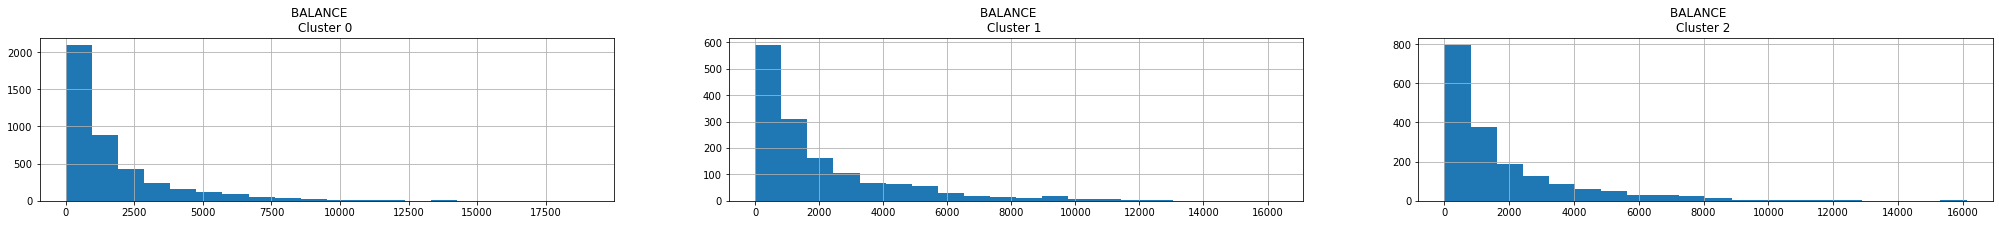

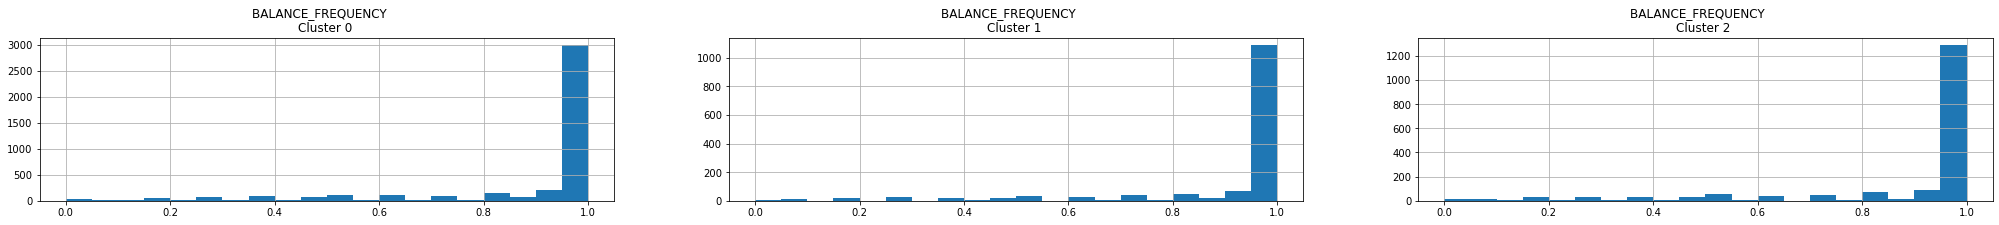

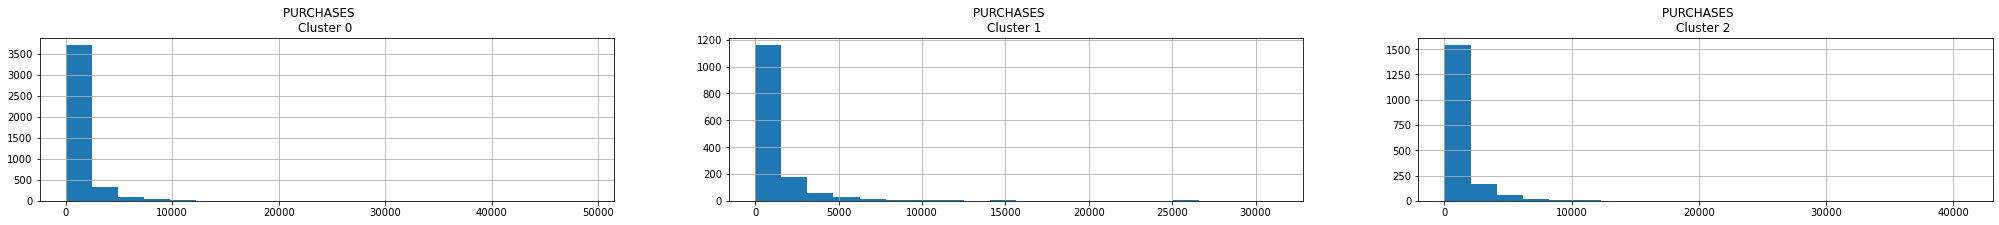

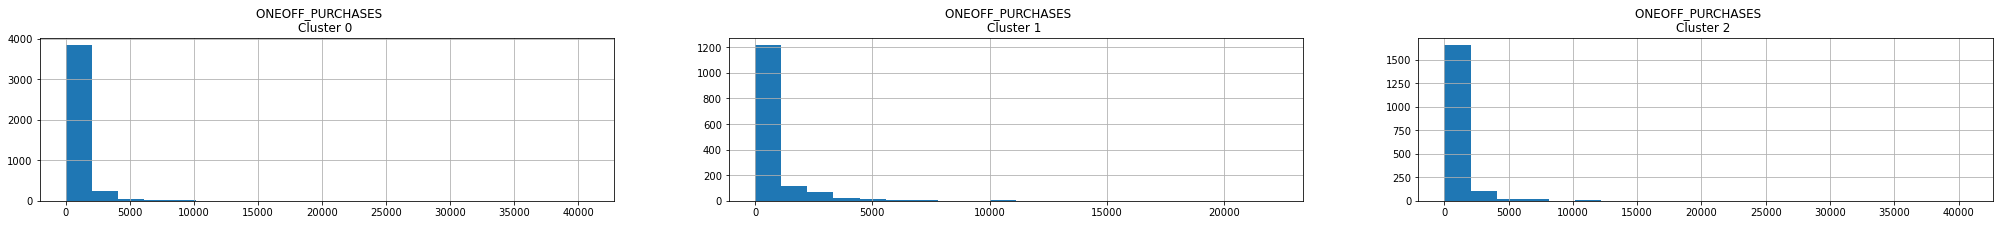

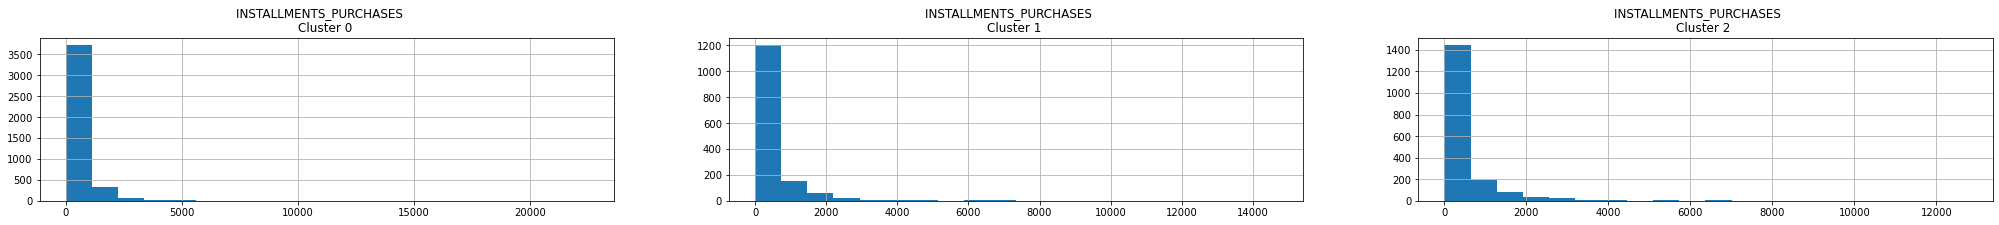

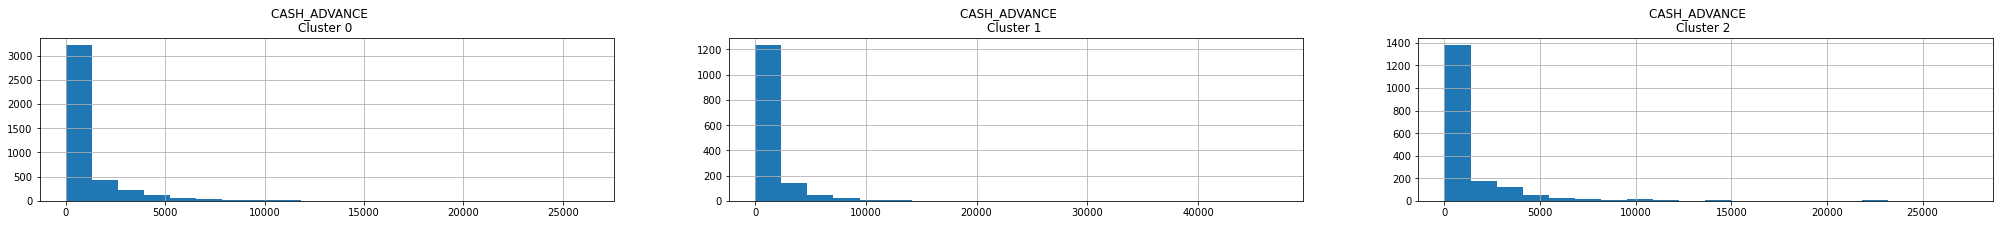

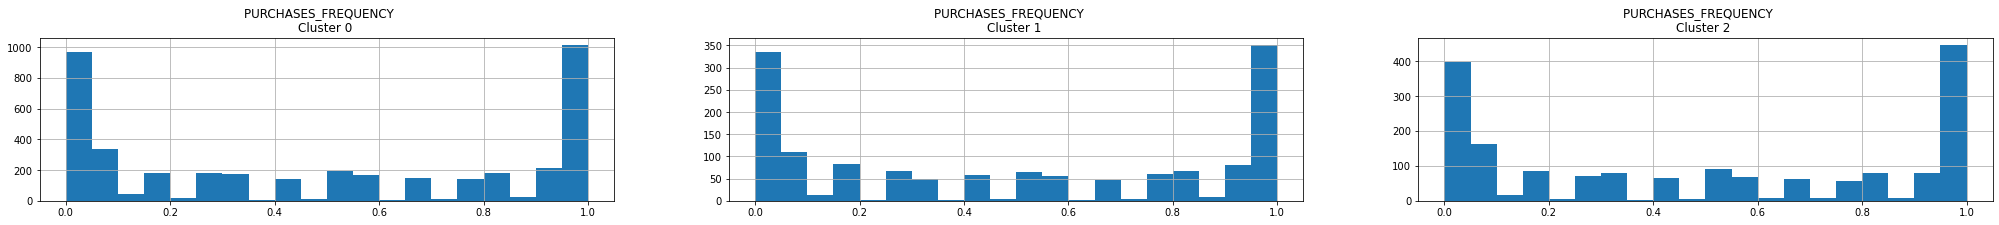

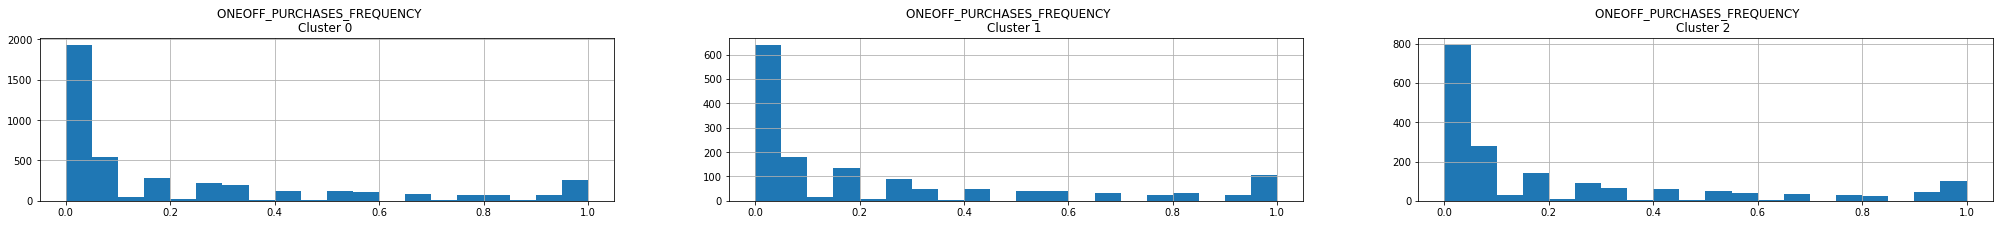

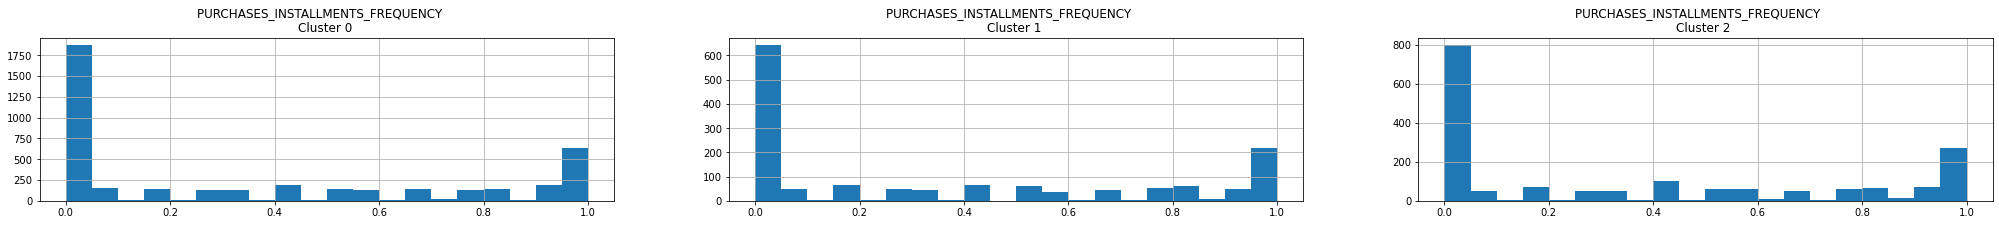

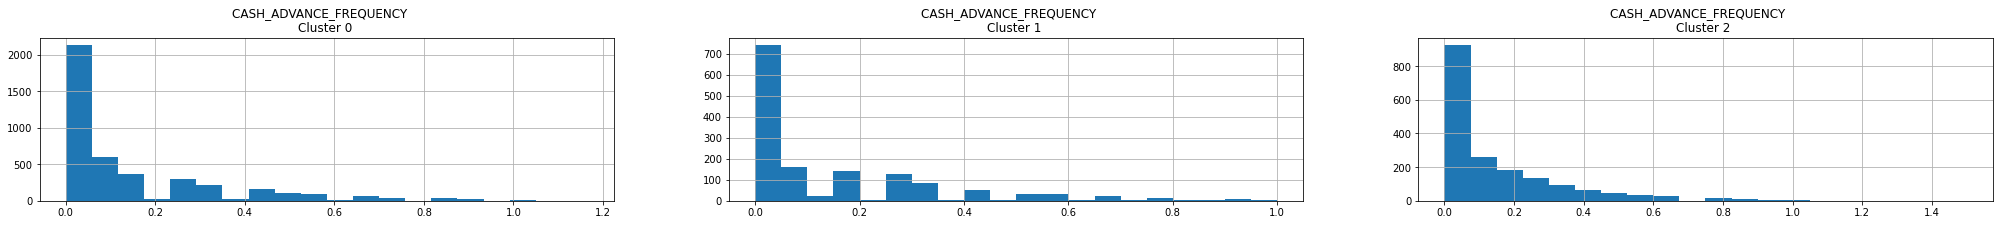

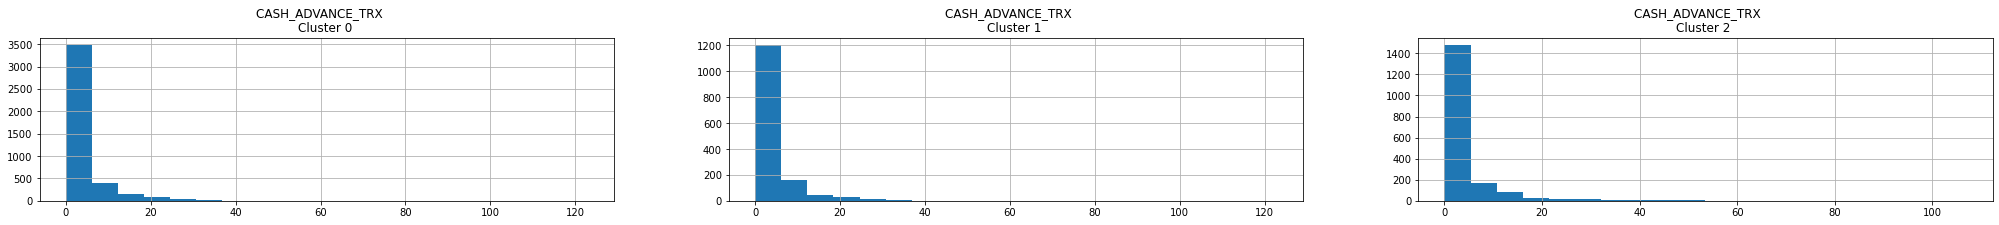

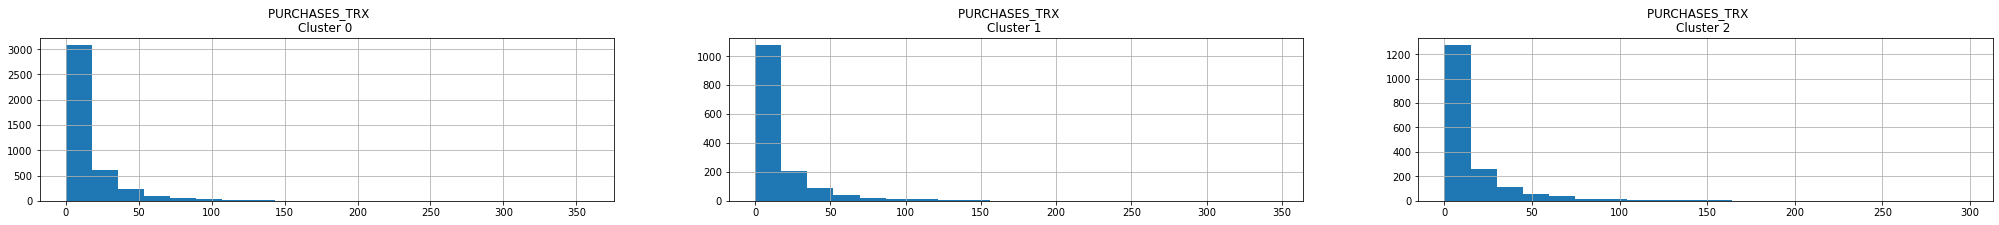

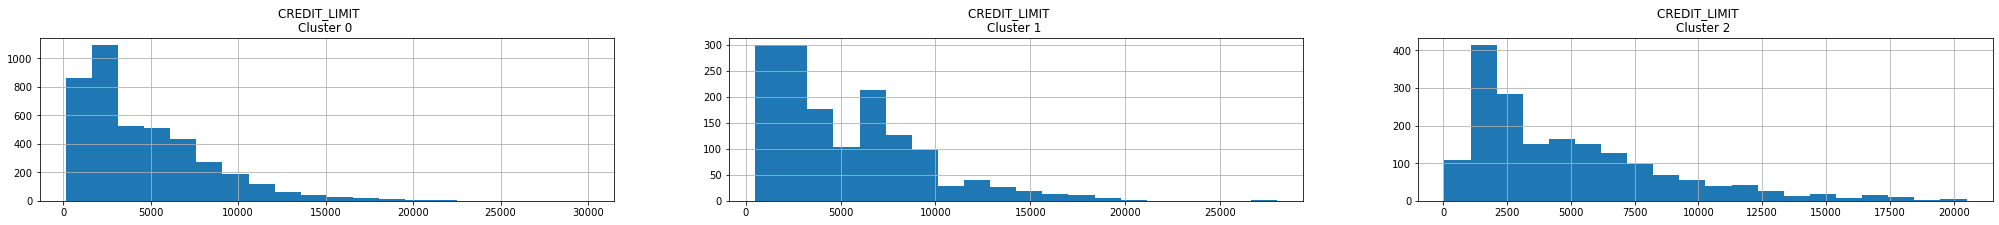

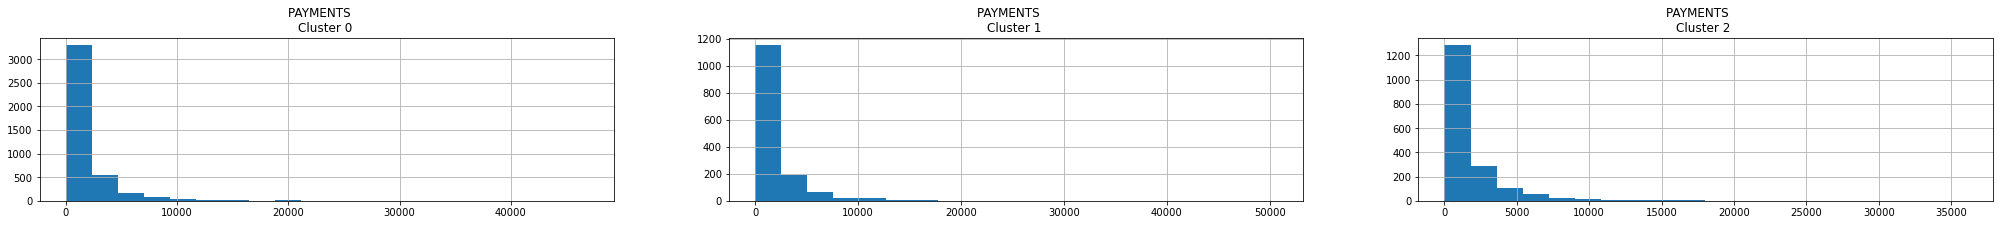

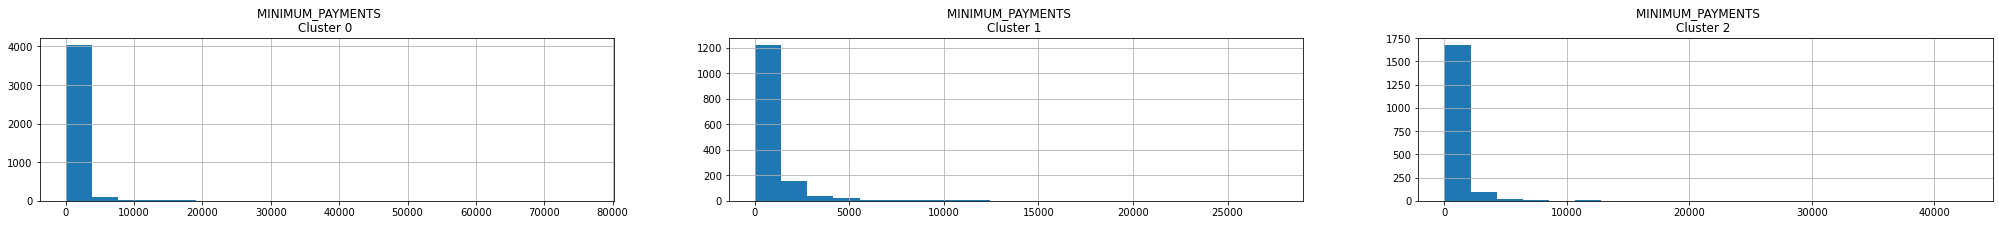

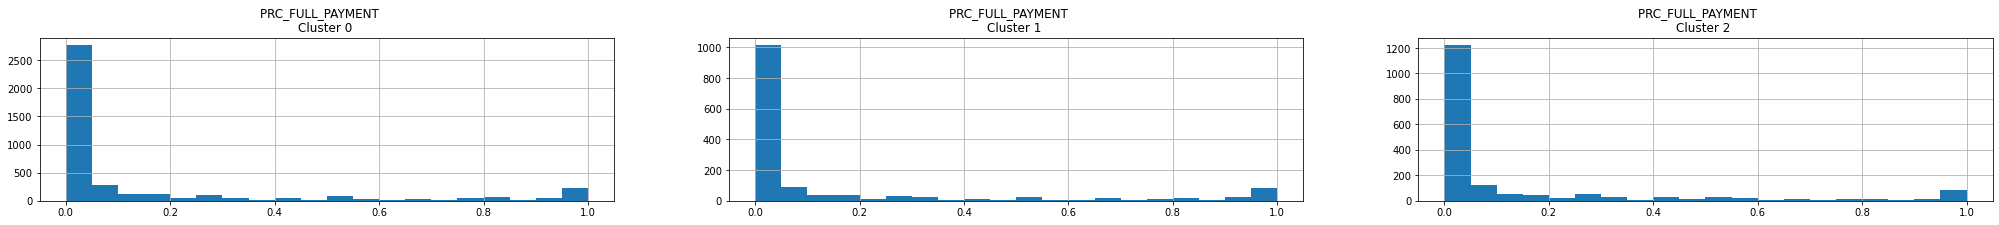

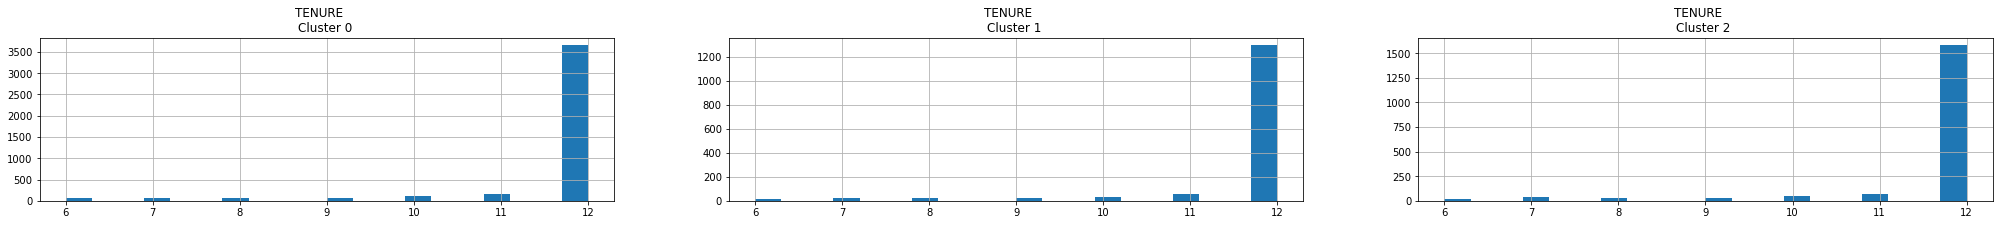

In [31]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 3))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

##### These distributions will show how data in clusters are distributed. This can be very useful while analysing difference between clusters. 

##### We can perform many other operations. But as of now, let's focus on further steps needed in model evaluation.

#### Step 5: Visualise clusters and see whether there is any overlap between the clusters

##### Before visualising clusters, let's apply PCA(Principal Component Analysis)

In [32]:
# PCA is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning
# These new transformed features are called the Principal Components
# PCA generally tries to find the lower-dimensional surface to project the high-dimensional data
# We can create PCA's of any dimension. Here we are creating 3-dimensional PCA's
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.33076842, -2.0400784 ,  0.19426013],
       [-2.77605993,  3.32009223,  0.44890667],
       [ 1.23812004,  0.5432093 ,  1.46692122],
       ...,
       [-2.5782976 , -1.1325715 ,  0.46324216],
       [-0.12165905, -1.94873939, -1.11682962],
       [-2.5196919 , -0.86900973,  0.5026538 ]])

In [33]:
pca_df = pd.DataFrame(data = principal_comp, columns =['Pca-1','Pca-2','Pca-3'])
pca_df.head()

,Pca-1,Pca-2,Pca-3
0,-1.330768,-2.040078,0.194260
1,-2.776060,3.320092,0.448907
2,1.238120,0.543209,1.466921
3,-0.574576,-0.219448,1.978082
4,-1.452052,-1.461354,0.261820


In [34]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,-1.330768,-2.040078,0.194260,0
1,-2.776060,3.320092,0.448907,2
2,1.238120,0.543209,1.466921,1
3,-0.574576,-0.219448,1.978082,0
4,-1.452052,-1.461354,0.261820,0


##### Let's visualise clusters now

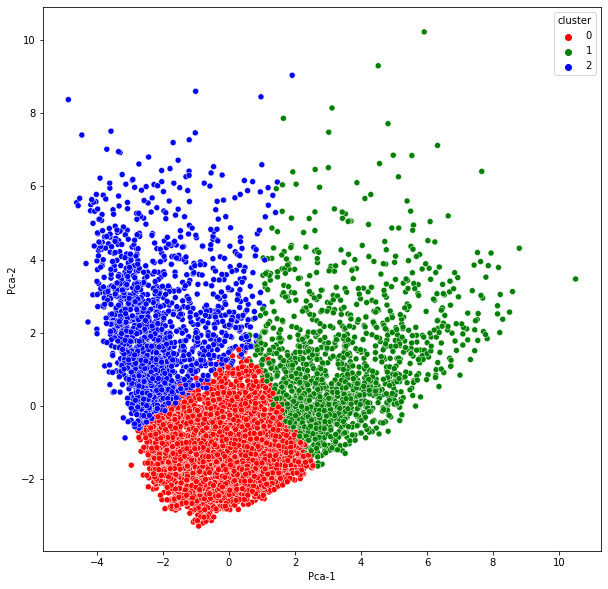

In [35]:
# Let's plot a 2-D scatter plot
# The drawback of using 2-D scatter plot is that we can use only two elements at a time
# Let's use "Pca-1" and "Pca-2" to plot scatter plots
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

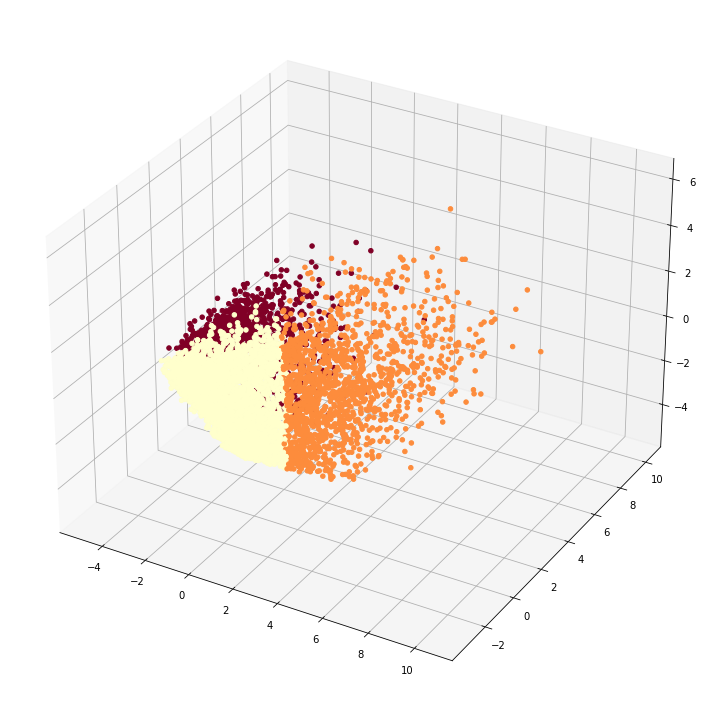

In [36]:
# Let's plot a 3-D scatter plot
# The drawback of 3-D plot is that we cannot see all the points on a 2D screen
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### Based on above scatter plots we can say that there is minimal overlap between the clusters.

##### Now that we have built a model for three clusters, let's build model for four clusters and see whether we get better results.

#### Step 3 (Re-execution): Let's build a model with K=4

In [37]:
kmeans = KMeans(4,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [38]:
kmeans.cluster_centers_.shape

(4, 17)

In [39]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.246348,0.324074,-0.431736,-0.301819,-0.402055,1.600986,-0.635122,-0.314496,-0.544940,1.580796,1.609660,-0.466175,0.483255,0.550793,0.805786,-0.427101,-0.089202
1,-0.255997,-0.360426,-0.472551,-0.272988,-0.529723,-0.247607,-0.726302,-0.272174,-0.701371,-0.175271,-0.236002,-0.575712,-0.302675,-0.348269,-0.216372,-0.248376,-0.020402
2,0.178625,0.375002,1.822030,1.769149,0.917444,-0.290706,1.038073,1.690346,0.593168,-0.340750,-0.304977,1.584290,0.775349,0.895540,0.038009,0.319914,0.190758
3,-0.474685,0.154170,0.015266,-0.346052,0.574487,-0.454352,0.958667,-0.296826,1.104544,-0.526806,-0.470006,0.325030,-0.250701,-0.287034,-0.186203,0.477276,-0.016090


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3161.601876,0.958798,310.433165,191.779823,118.681229,2649.577526,0.234032,0.101895,0.143551,0.360656,8.657831,5.009639,5418.290130,2088.726162,1202.990943,0.030366,11.679518
1,881.266325,0.812738,268.582211,214.657615,54.083597,366.099966,0.197896,0.114067,0.082136,0.081850,1.384467,3.353529,3111.033409,797.311192,409.509647,0.082341,11.734451
2,1540.957359,0.969665,2621.383638,1835.109557,786.319326,312.862106,0.897158,0.678486,0.590374,0.055577,1.112650,36.011080,6275.791153,2583.921294,606.980797,0.247603,11.903047
3,549.330464,0.922543,768.776825,156.680599,612.790474,110.718078,0.865687,0.106977,0.791141,0.026038,0.462307,16.972042,3263.613796,885.269907,432.929691,0.293364,11.737893


##### Based on cluster centres, we will see whether we can find features of each cluster centre which will standout and represent that cluster

##### Cluster-0: Same as Cluster-2 in K=3 model

##### Cluster-2: Same as Cluster-1 in K=3 model

##### Cluster-1 & Cluster-3: Though both the clusters have similar credit limit, below attributes are different.
    a. INSTALLMENTS_PURCHASES: Cluster-3 has significantly higher value in Installment purchases when compared  to Cluster-1.
    b. CASH_ADVANCE: Cluster-1 has higher value in Cash advances when compared to Cluster-3.

So, based on these differences we can find significant differences between these two clusters.

#### Step 4 (Re-execution): We will add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [41]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0


##### Let's get the number of observations in each cluster 

In [42]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,1247
1.0,3105
2.0,1083
3.0,1999


#### Step 5 (Re-execution): Visualise clusters and see whether there is any overlap between the clusters

#### Since we have already applied PCA, Let's drop the labels created while building K-means model with K=3 and add new labels created while building K-means model with K=4

In [43]:
# Dropping 'cluster' so that numbers given while building K-means model with K=3 will be dropped
pca_df.drop(['cluster'], axis='columns', inplace=True)

# Adding 'cluster' so that numbers given while building K-means model with K=4 will be added
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,-1.330768,-2.040078,0.194260,1
1,-2.776060,3.320092,0.448907,0
2,1.238120,0.543209,1.466921,2
3,-0.574576,-0.219448,1.978082,1
4,-1.452052,-1.461354,0.261820,1


##### Let's visualise clusters now

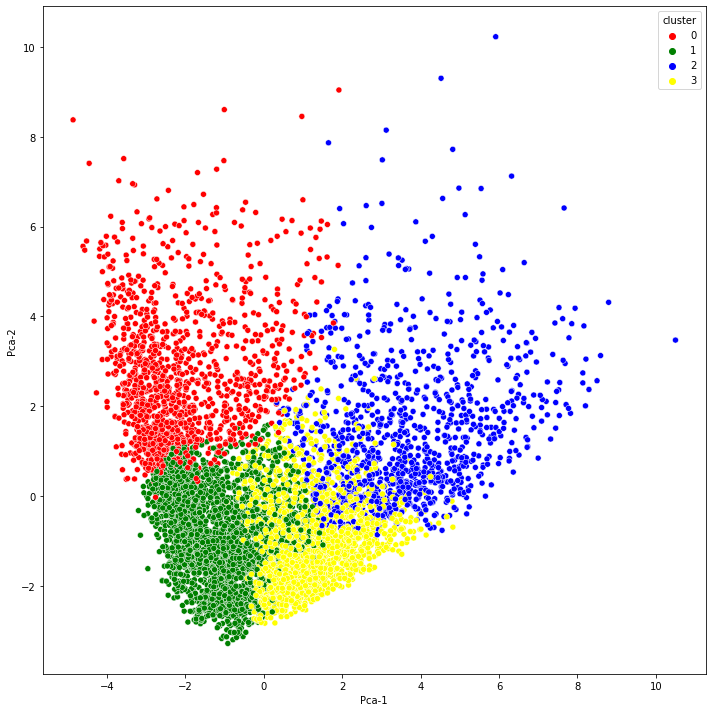

In [44]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green','blue', 'yellow'])
plt.show()

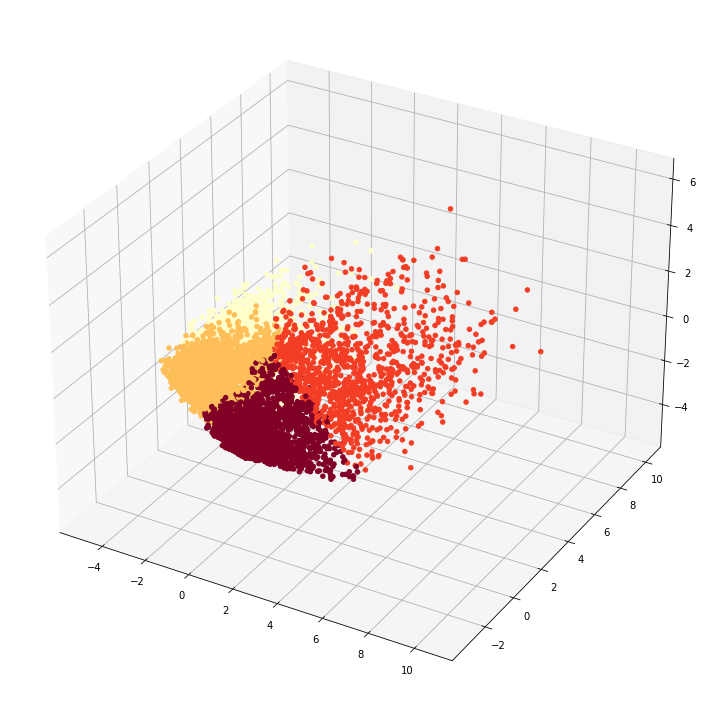

In [45]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### By looking into 2-D graph, there seems to be an overlap. Since we are tring to view 3-D graph on a 2-D screen, we are not getting to know clearly whether there is any overlap. But based on cluster center analysis, we can say that building a model with 4 clusters is better than building a model with 3 clusters because we can find significant difference between each of the 4 clusters.

##### Now that we have built a model for four clusters, let's build model for five clusters and see whether we get better results.

#### Step 3 (Re-execution): Let's build a model with K=5

In [46]:
kmeans = KMeans(5,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [47]:
kmeans.cluster_centers_.shape

(5, 17)

In [48]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.311374,0.333642,-0.415624,-0.293051,-0.383147,1.761589,-0.605004,-0.309681,-0.514137,1.694200,1.754170,-0.446018,0.536712,0.606480,0.785475,-0.432156,-0.103385
1,-0.764198,-2.129387,-0.417867,-0.284490,-0.400670,-0.329601,-0.544806,-0.379899,-0.458967,-0.485687,-0.420702,-0.515233,-0.162849,-0.283044,-0.551618,0.376166,-0.130898
2,0.172811,0.375132,1.896966,1.854037,0.936182,-0.285836,1.045288,1.715294,0.607545,-0.341227,-0.305562,1.625718,0.810420,0.933293,0.023460,0.349735,0.181389
3,-0.450390,0.294880,0.062648,-0.323959,0.635702,-0.448513,1.008039,-0.245160,1.144190,-0.518345,-0.464330,0.387916,-0.249660,-0.266945,-0.153032,0.431614,-0.005560
4,0.023601,0.401716,-0.482982,-0.272576,-0.551451,-0.182578,-0.728377,-0.225852,-0.729813,-0.002731,-0.117507,-0.568724,-0.321193,-0.338332,-0.002741,-0.462478,0.032810


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [49]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3260.300552,0.960839,326.953419,198.737369,128.247874,2847.962906,0.245969,0.103280,0.155644,0.378661,9.227314,5.314390,5575.225676,2168.715257,1187.223882,0.028896,11.668194
1,109.893829,0.435272,324.653340,205.530943,119.381642,264.816713,0.269827,0.083085,0.177304,0.032566,0.656604,4.267925,3521.522584,891.001085,149.265090,0.263961,11.646226
2,1532.132552,0.969693,2698.220640,1902.468749,795.800167,318.877489,0.900017,0.685661,0.596018,0.055502,1.110345,36.637438,6378.750560,2638.149460,595.686519,0.256275,11.895567
3,586.207443,0.952568,817.361057,174.211908,643.763990,117.931111,0.885255,0.121836,0.806706,0.027381,0.484672,17.922833,3266.670804,914.125247,458.679518,0.280085,11.746300
4,1305.654502,0.975365,257.886599,214.984583,43.089676,446.427031,0.197073,0.127389,0.070969,0.109244,1.851431,3.459175,3056.670875,811.585404,575.347146,0.020079,11.776936


##### Based on cluster centres, we will see whether we can find features of each cluster centre which will standout and represent that cluster.

##### Cluster-0: Same as Cluster-2 in K=3 model

##### Cluster-2: Same as Cluster-1 in K=3 model

##### Cluster-3: Same as Cluster-3 in K=4 model

##### Cluster-1 & Cluster-4: Both these clusters are almost similar. 

#### Step 4 (Re-execution): We will add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [50]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4.0


##### Let's get the number of observations in each cluster 

In [51]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,1094
1.0,1059
2.0,1016
3.0,1889
4.0,2376


#### Step 5 (Re-execution): Visualise clusters and see whether there is any overlap between the clusters

##### Since we have already applied PCA, Let's drop the labels created while building K-means model with K=4 and add new labels created while building K-means model with K=5

In [52]:
# Dropping 'cluster' so that numbers given while building K-means model with K=4 will be dropped
pca_df.drop(['cluster'], axis='columns', inplace=True)

# Adding 'cluster' so that numbers given while building K-means model with K=5 will be added
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,-1.330768,-2.040078,0.194260,4
1,-2.776060,3.320092,0.448907,0
2,1.238120,0.543209,1.466921,2
3,-0.574576,-0.219448,1.978082,4
4,-1.452052,-1.461354,0.261820,4


##### Let's visualise clusters now

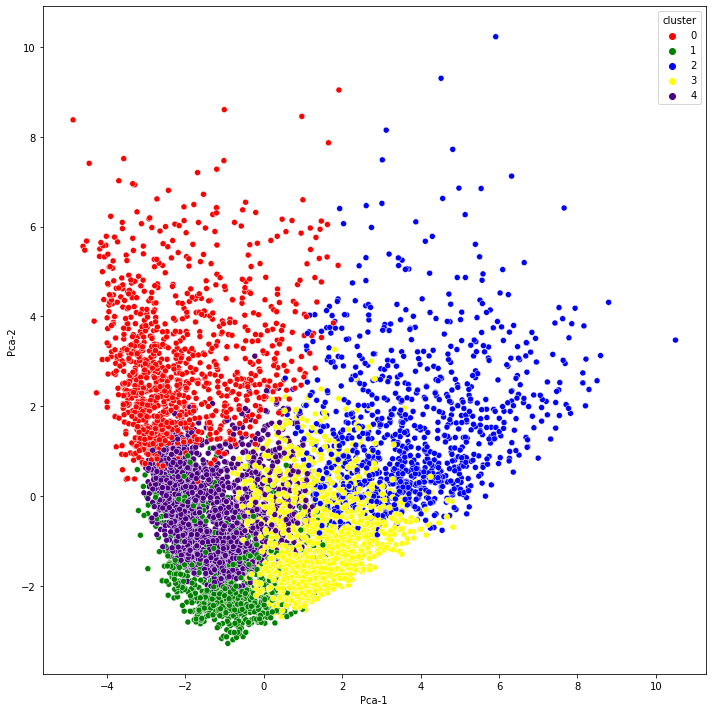

In [53]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow','indigo'])
plt.show()

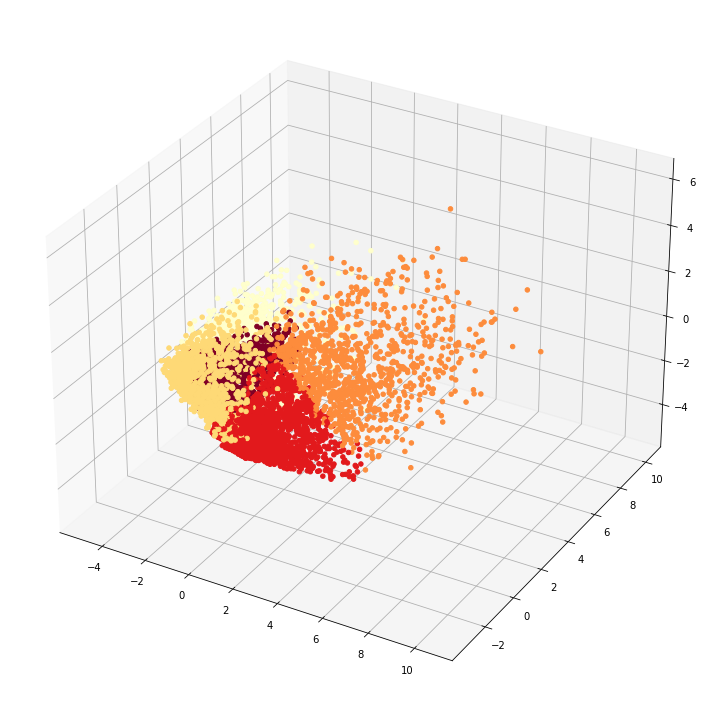

In [54]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### By looking into 2-D graph, there seems to be too much of overlap. Since we are tring to view 3-D graph on a 2-D screen, we are not getting to know clearly whether there is any overlap. But, still we are able to find the overlap in 3-D graph also. So, we have to analyse based on Cluster centres. Based on cluster center analysis, we can say that building a model with 5 clusters is not better than a model with 3 clusters or 4 clusters.

##### So based on the analysis till now, we can say that building 4 clusters is better than building 3 clusters or 5 clusters. We can find significant difference between each of the 4 clusters, which is definitely not the case with 5 clusters. Though there is significant difference between each of the 3 clusters in 3 cluster model, 4 cluster model has also showed significant difference between each of the 4 clusters. It is upto the marketing team whether they need 3 clusters or 4 clusters. Both of them have given us satisfactory results.